In [1]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

In [2]:
# Step 1: Install kaggle
!pip install -q kaggle

# Step 2: Set Kaggle credentials (paste your username & key here)
import os
os.environ['KAGGLE_USERNAME'] = "ashikurrahman2"
os.environ['KAGGLE_KEY'] = "467d3db544d859c777f9e8863cc51ed7"

!kaggle datasets download -d ashwingupta3012/male-and-female-faces-dataset


Dataset URL: https://www.kaggle.com/datasets/ashwingupta3012/male-and-female-faces-dataset
License(s): CC0-1.0
 99% 1.62G/1.63G [00:11<00:00, 50.6MB/s]
100% 1.63G/1.63G [00:12<00:00, 141MB/s] 


In [3]:
import zipfile
zip_ref = zipfile.ZipFile("/content/male-and-female-faces-dataset.zip", 'r')
zip_ref.extractall("/content/male-and-female-faces-dataset")
zip_ref.close()

In [4]:
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPooling2D, Flatten,BatchNormalization,Dropout


In [5]:
train_ds = keras.utils.image_dataset_from_directory(
    "/content/male-and-female-faces-dataset/Male and Female face dataset",
    labels="inferred",
    label_mode="int",
    image_size=(256, 256),  # <-- match the Input layer
    batch_size=32,
    shuffle=True,
    validation_split=0.2,
    subset="training",
    seed=123
)

validation_ds = keras.utils.image_dataset_from_directory(
    "/content/male-and-female-faces-dataset/Male and Female face dataset",
    labels="inferred",
    label_mode="int",
    image_size=(256, 256),  # <-- match the Input layer
    batch_size=32,
    shuffle=True,
    validation_split=0.2,
    subset="validation",
    seed=123
)


Found 5418 files belonging to 2 classes.
Using 4335 files for training.
Found 5418 files belonging to 2 classes.
Using 1083 files for validation.


In [6]:
# Normalization

def process(image, label):
  image = tf.cast(image/255.0, tf.float32)
  return image, label

train_ds = train_ds.map(process)
validation_ds = validation_ds.map(process)

In [7]:
from keras.models import Sequential
from keras.layers import Input, Conv2D, MaxPooling2D, Flatten, Dense

model = Sequential([
    Input(shape=(256, 256, 3)),
    Conv2D(32, kernel_size=(3,3), padding="valid", activation="relu"),
    BatchNormalization(),
    MaxPooling2D(pool_size=(2,2), strides=2, padding="valid"),

    Conv2D(64, kernel_size=(3,3), padding="valid", activation="relu"),
    BatchNormalization(),
    MaxPooling2D(pool_size=(2,2), strides=2, padding="valid"),

    Conv2D(128, kernel_size=(3,3), padding="valid", activation="relu"),
    BatchNormalization(),
    MaxPooling2D(pool_size=(2,2), strides=2, padding="valid"),

    Flatten(),
    Dense(128, activation="relu"),
    Dropout(0.1),
    Dense(64, activation="relu"),
    Dropout(0.1),
    Dense(1, activation="sigmoid")
])


In [8]:
model.compile(optimizer='adam',loss = 'binary_crossentropy',metrics=['accuracy'])

In [9]:
history = model.fit(train_ds,epochs = 10,validation_data = validation_ds)

Epoch 1/10
136/136 ━━━━━━━━━━━━━━━━━━━━ 101s 629ms/step - accuracy: 0.6674 - loss: 3.5203 - val_accuracy: 0.5743 - val_loss: 2.8678
Epoch 2/10
136/136 ━━━━━━━━━━━━━━━━━━━━ 84s 616ms/step - accuracy: 0.7587 - loss: 1.2671 - val_accuracy: 0.6048 - val_loss: 1.2976
Epoch 3/10
136/136 ━━━━━━━━━━━━━━━━━━━━ 78s 575ms/step - accuracy: 0.8309 - loss: 0.5354 - val_accuracy: 0.7581 - val_loss: 0.7357
Epoch 4/10
136/136 ━━━━━━━━━━━━━━━━━━━━ 85s 602ms/step - accuracy: 0.8904 - loss: 0.3245 - val_accuracy: 0.8938 - val_loss: 0.3313
Epoch 5/10
136/136 ━━━━━━━━━━━━━━━━━━━━ 82s 598ms/step - accuracy: 0.9295 - loss: 0.2171 - val_accuracy: 0.9344 - val_loss: 0.2193
Epoch 6/10
136/136 ━━━━━━━━━━━━━━━━━━━━ 82s 603ms/step - accuracy: 0.9420 - loss: 0.1851 - val_accuracy: 0.9511 - val_loss: 0.1984
Epoch 7/10
136/136 ━━━━━━━━━━━━━━━━━━━━ 82s 603ms/step - accuracy: 0.9647 - loss: 0.1090 - val_accuracy: 0.9658 - val_loss: 0.1192
Epoch 8/10
136/136 ━━━━━━━━━━━━━━━━━━━━ 76s 557ms/step - accuracy: 0.9809 - loss: 

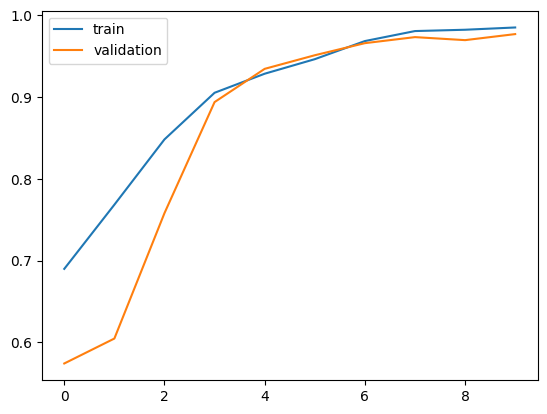

In [10]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'], label='train')
plt.plot(history.history['val_accuracy'], label='validation')
plt.legend()
plt.show()

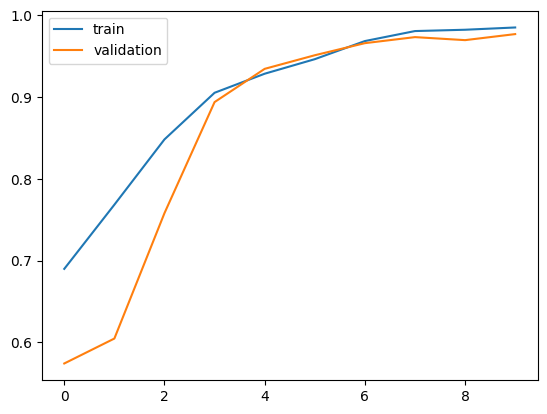

In [11]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'], label='train')
plt.plot(history.history['val_accuracy'], label='validation')
plt.legend()
plt.show()